# **Project Name**    - Calories Burnt Prediction using Machine Learning



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **industry**        - Health Care
##### **By**              - Kedar Deshmukh


# **Project Summary -**

In this project we will analyse and build a **regression model** on the data set containing data from various sensors and biological measurement while working out and the number of **calories burnt.**

We  will start with importing required libraries, then we will load the data from the **CSV** file and do the basic exploration like first look of the data set, shape of the data set, information of the data set, presence of any duplicate value, presence of any **null values or missing values**.

Then we will understand are variables.

Then we will move to **data visualisation** where we will try to explore data using various charts and plots.

Then we will do to **feature engineering** and data preprocessing where we will first handle the outliers, **encoding** the categorical column and removing the unnecessary features.

And finally we will move to model implementation where we will Implement various **regression model** using various features. And try to select best model and do the **cross validation**.

At the end we will provide a **future scope** for this project

# **Problem Statement**


In this project we have data set containing recordings of thousands of people exercise station where data from various sensors and their biological measurements were recorded and how many calories they burnt during the session

Our task is to
- do the exploratory analysis of this data set
- find the meaningful insights and
- create a ml model which can predict number of calories burnt based on the various sensor data and biological measurement

Link to data set:-
https://drive.google.com/file/d/1-o55umtrWOZ-QrdZS0aZ3jwnJ6Mce5yj/view?usp=sharing

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries

# Imported numpy and pandas for data wrangling ,analysis
import numpy as np
import pandas as pd

# Imported matplotlib leaf and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Imported warnings for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('calories_exercise.csv')


### Dataset First View

In [ ]:
# Dataset First Look
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(15000, 9)

### Dataset Information

In [ ]:
# Dataset Info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data set is pretty clean without any null or duplicate values.

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Variables Description



1. **User_ID**: Unique identifier for each user.
2. **Gender**: Gender of the user ('Male' or 'Female').
3. **Age**: Age of the user in years.
4. **Height**: Height of the user in centimeters or inches.
5. **Weight**: Weight of the user in kilograms or pounds.
6. **Duration**: Duration of the activity in minutes.
7. **Heart_Rate**: Heart rate of the user during the activity.
8. **Body_Temp**: Body temperature of the user in degrees Celsius or Fahrenheit.
9. **Calories**: Number of calories burned during the activity.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

## ***Data Vizualization,***

#### Chart - Gender Distribution in study

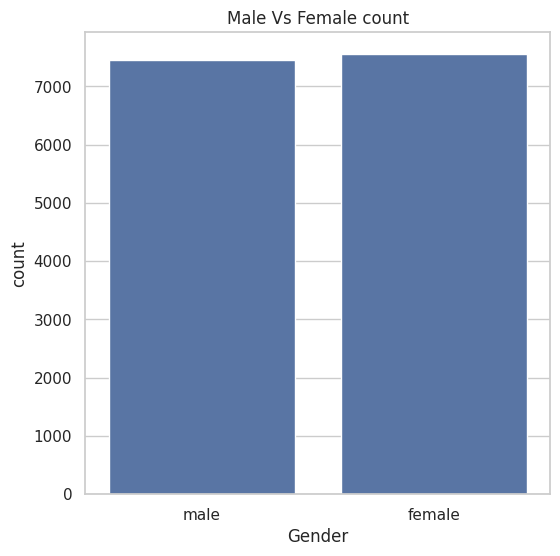

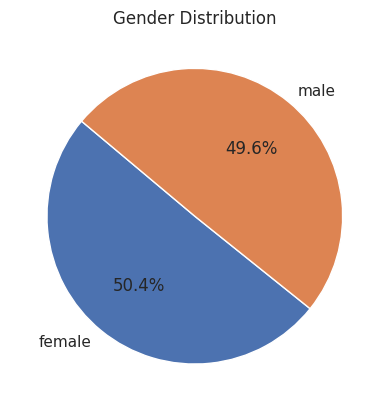

In [ ]:
# Chart - 1 visualization code.
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.title('Male Vs Female count')
plt.show()

gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


This data set has amost equeal no of male and female which is very good for model creation because of this model wont have any gender speceic bias.

#### Chart - Bar Plot for gender, heartrate, age group

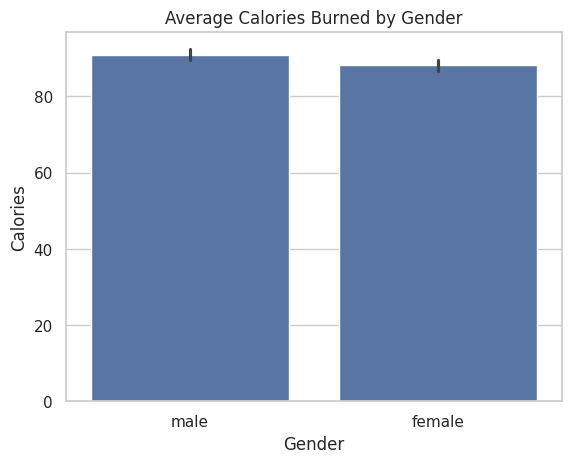

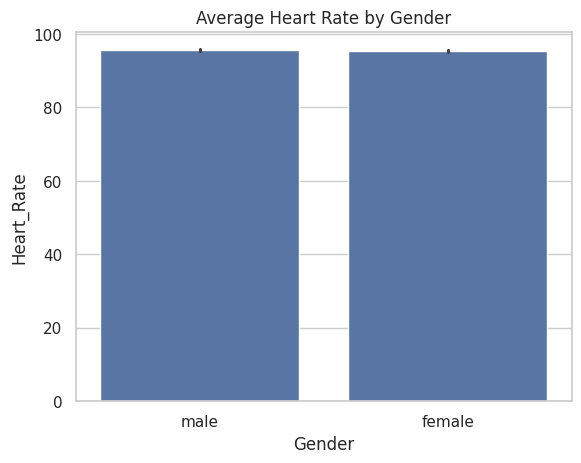

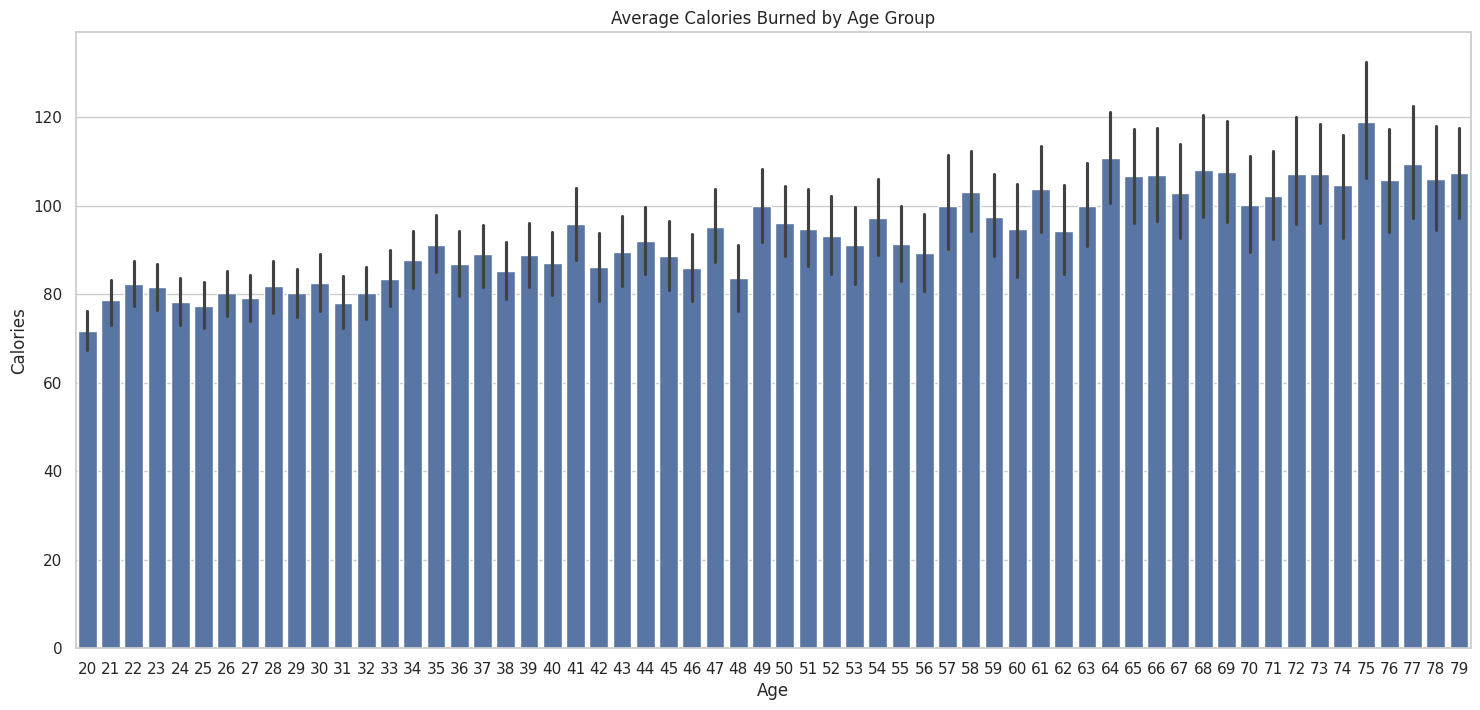

In [ ]:
# Chart - 6 visualization code
plt.figure()
sns.barplot(data=data, x='Gender', y='Calories')
plt.title('Average Calories Burned by Gender')
plt.show()

plt.figure()
sns.barplot(data=data, x='Gender', y='Heart_Rate')
plt.title('Average Heart Rate by Gender')
plt.show()

plt.figure(figsize=(18, 8))
sns.barplot(data=data, x='Age', y='Calories')
plt.title('Average Calories Burned by Age Group')
plt.show()


For Bar chart we can see
- There is not much diffrence in calories burt based on gender.
- There is also no diffrence in heart rate based on gender.
- but we noticed higher the age higher calories ar burned for same ativity.

#### Chart - 8

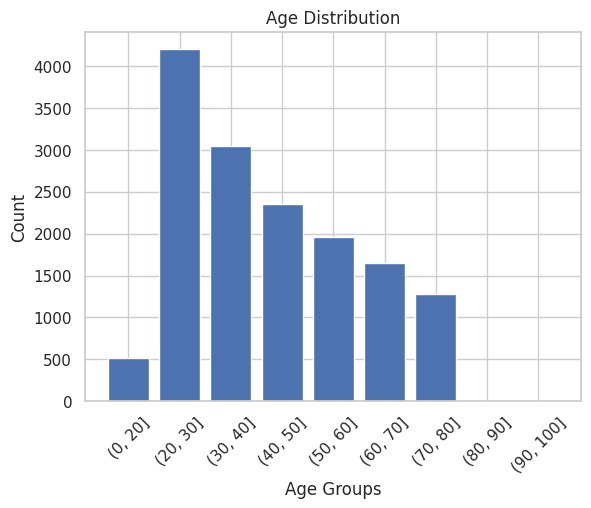

In [ ]:


# Bar chart: Age Groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_groups = pd.cut(data['Age'], bins=bins)
age_group_counts = age_groups.value_counts().sort_index()
plt.bar(age_group_counts.index.astype(str), age_group_counts.values)
plt.xlabel('Age Groups')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


Data set contains people from all age groups but people with 20's has highers count followed by 30' and 40'
Which also shows then which age group prefer to exercise.

#### Chart - Distribution Plot

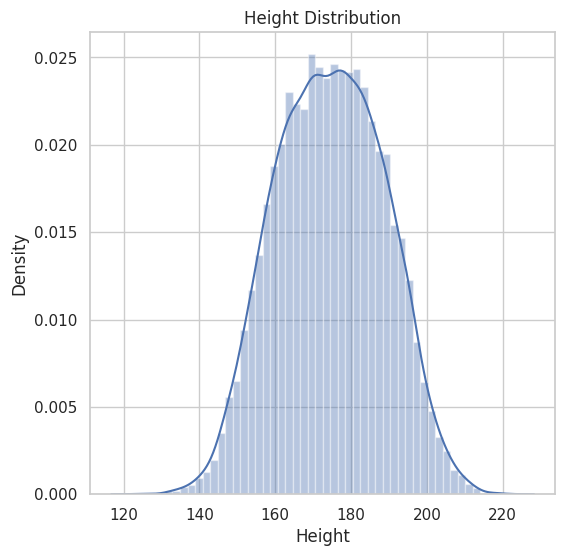

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(6,6))
sns.distplot(x=data.Height)
plt.xlabel('Height')
plt.title('Height Distribution')
plt.show()

We can see height of people in data set follows a natural distribution with mean around 175



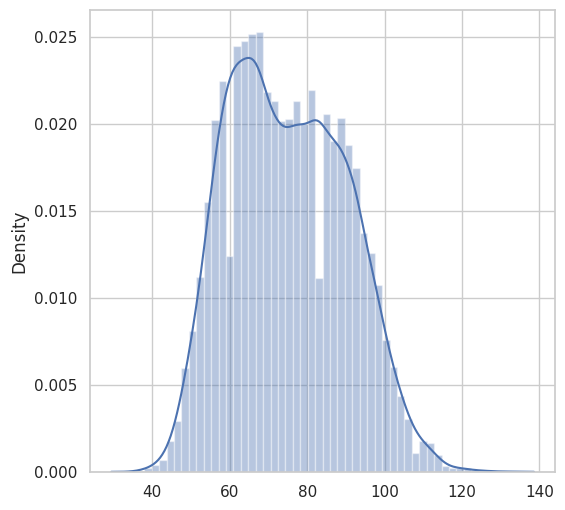

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(6,6))
sns.distplot(x=data.Weight)
plt.show()

Weight of the people is also near to natural distribution with mean around 70 but is little left skewed



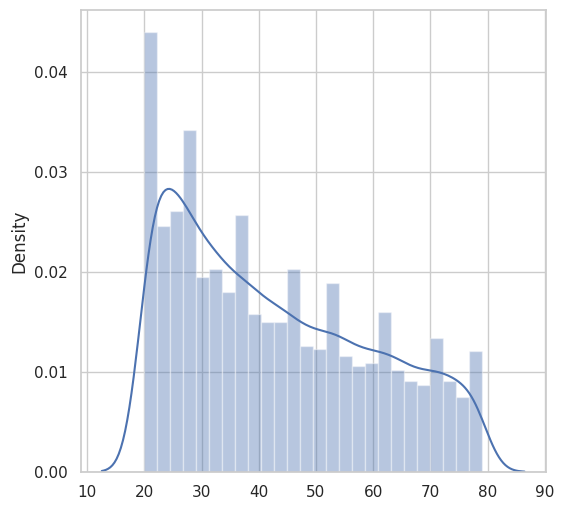

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(6,6))
sns.distplot(x=data.Age)
plt.show()

Distribution of age is highly left skewed with mean around 30


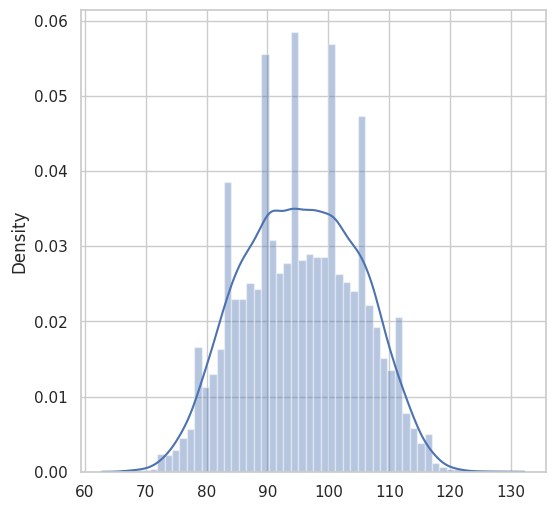

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Heart_Rate)
plt.show()

Distribution of heart rate is also written as well with mean around 95

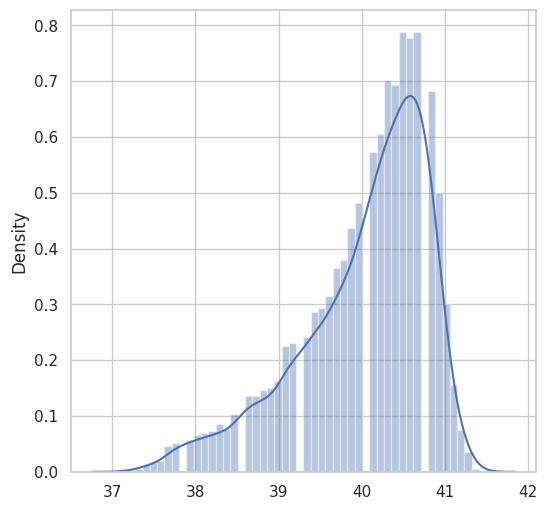

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Body_Temp)
plt.show()

Distriubtion of body tempreture is right skewed with mean tat 40.5

#### Chart - Corelation Heat map

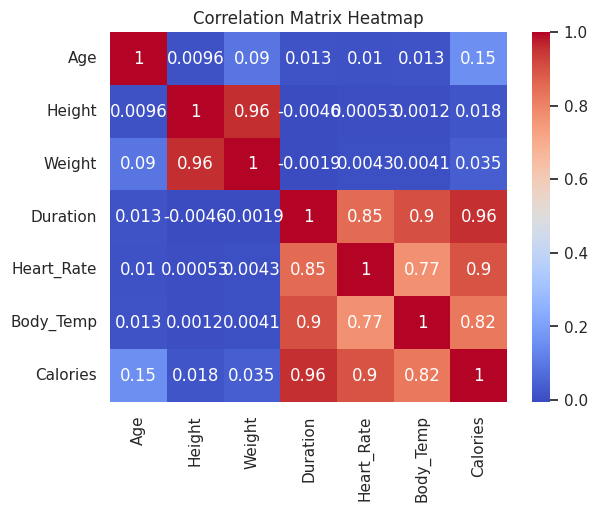

In [ ]:
# Chart - 13 visualization code
# Heatmap of correlation matrix
numeric_data = data.drop(['User_ID', 'Gender'], axis=1)
corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


Looking at the correlation heat map you see some variable show very high corelation
- such as height and weight shows a correlation of 0.96

- Similarly duration and the calories burn has a very high correlation of 0.96 an heart rate Body temperature also has very high quality with the calories burn

- Body temperature and duration as also very good quotation with heart rate

#### Chart - Scatter Plot

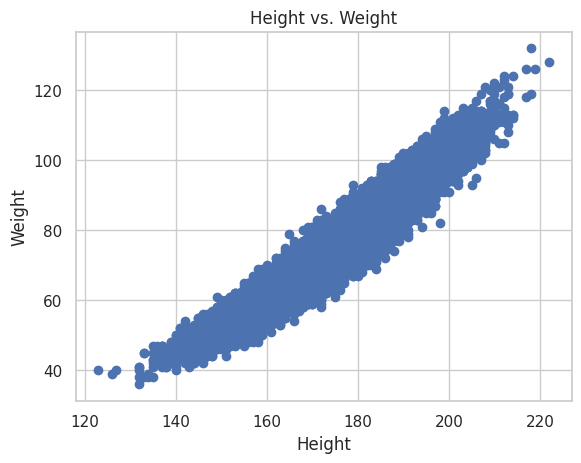

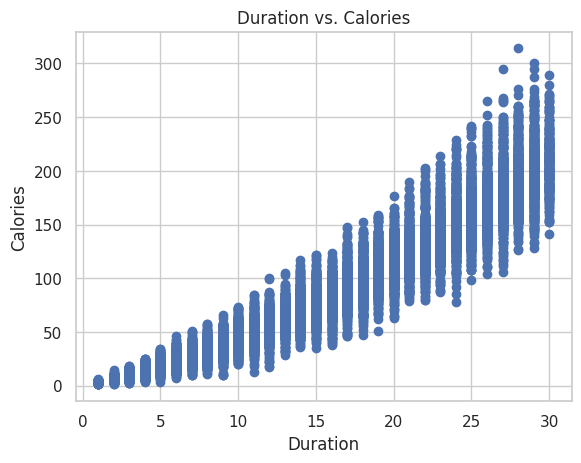

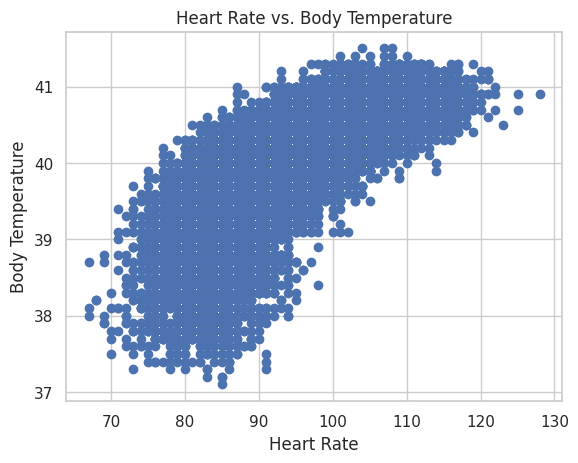

In [ ]:
# Scatter plot: Height vs. Weight
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.show()

# Scatter plot: Duration vs. Calories
plt.scatter(data['Duration'], data['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs. Calories')
plt.show()

# Scatter plot: Heart Rate vs. Body Temp
plt.scatter(data['Heart_Rate'], data['Body_Temp'])
plt.xlabel('Heart Rate')
plt.ylabel('Body Temperature')
plt.title('Heart Rate vs. Body Temperature')
plt.show()


These scatter plot show strong positive corelation which validates the finding and we have in heatmap

#### Chart - Box Plot

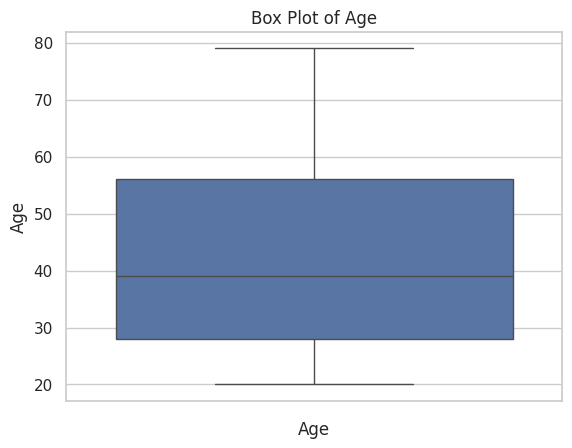

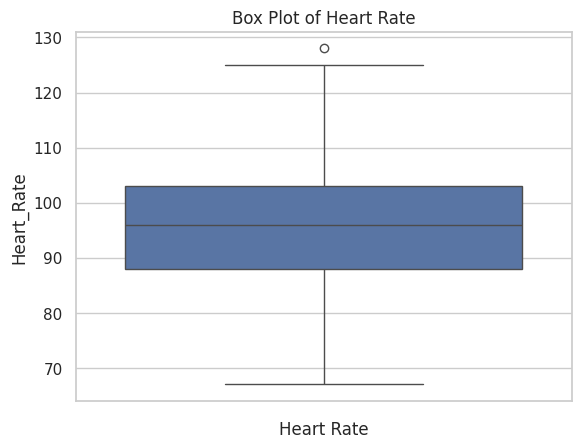

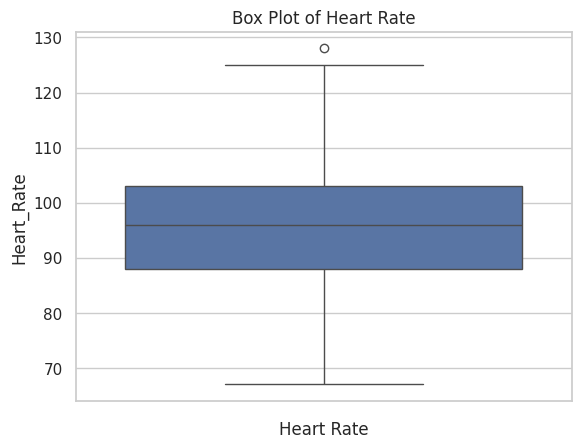

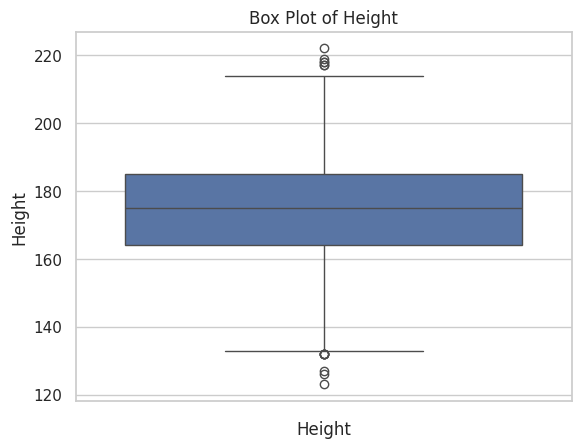

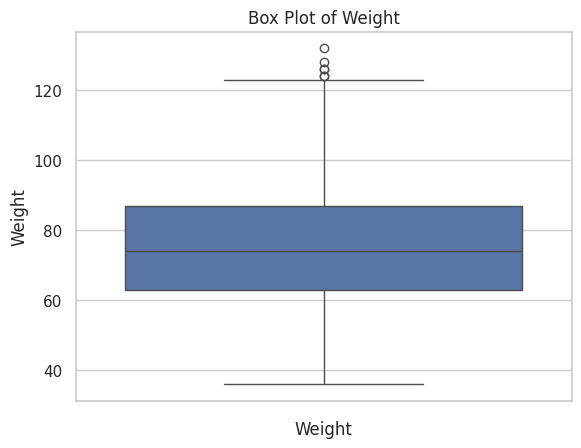

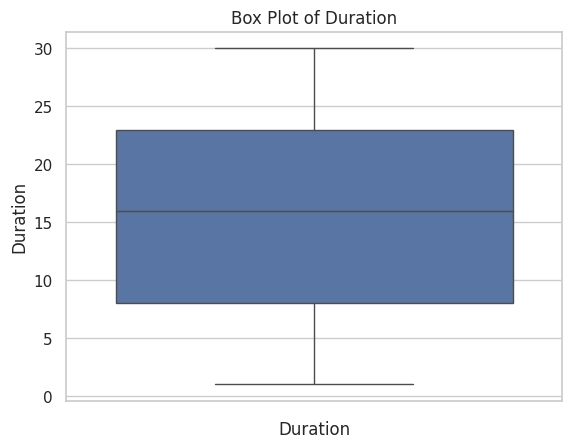

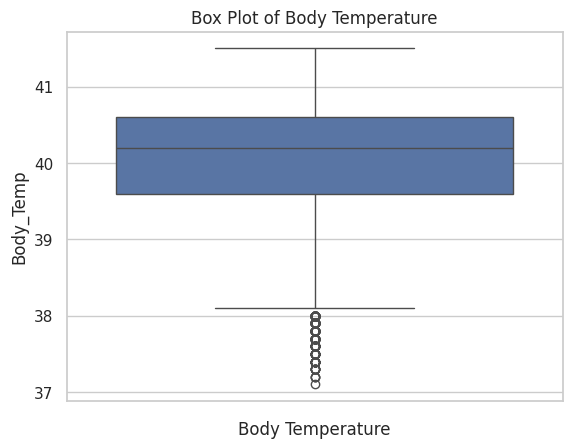

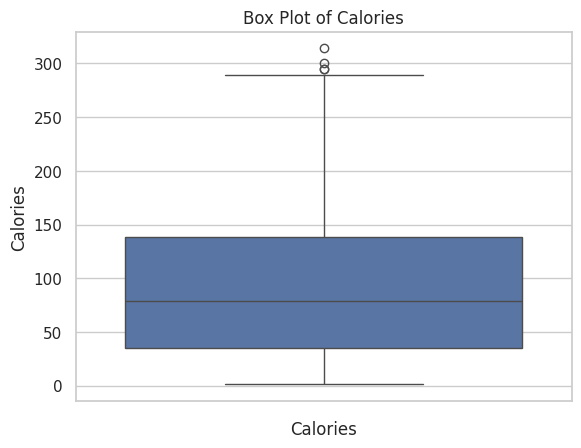

In [ ]:

# Set the style of the visualization
# Pie chart: Gender Distribution
import seaborn as sns

# Box plot: Age
sns.boxplot(data=data['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

# Box plot: Heart Rate
sns.boxplot(data=data['Heart_Rate'])
plt.xlabel('Heart Rate')
plt.title('Box Plot of Heart Rate')
plt.show()



# Box plot: Heart Rate

sns.boxplot(data=data['Heart_Rate'])
plt.xlabel('Heart Rate')
plt.title('Box Plot of Heart Rate')
plt.show()

# Box plot: Height

sns.boxplot(data=data['Height'])
plt.xlabel('Height')
plt.title('Box Plot of Height')
plt.show()

# Box plot: Weight

sns.boxplot(data=data['Weight'])
plt.xlabel('Weight')
plt.title('Box Plot of Weight')
plt.show()

# Box plot: Duration

sns.boxplot(data=data['Duration'])
plt.xlabel('Duration')
plt.title('Box Plot of Duration')
plt.show()

# Box plot: Body Temp

sns.boxplot(data=data['Body_Temp'])
plt.xlabel('Body Temperature')
plt.title('Box Plot of Body Temperature')
plt.show()

# Box plot: Calories

sns.boxplot(data=data['Calories'])
plt.xlabel('Calories')
plt.title('Box Plot of Calories')
plt.show()



#### Chart - 14 - Violine plot

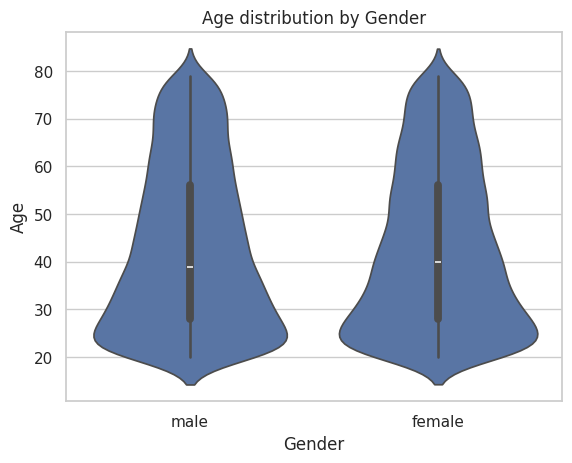

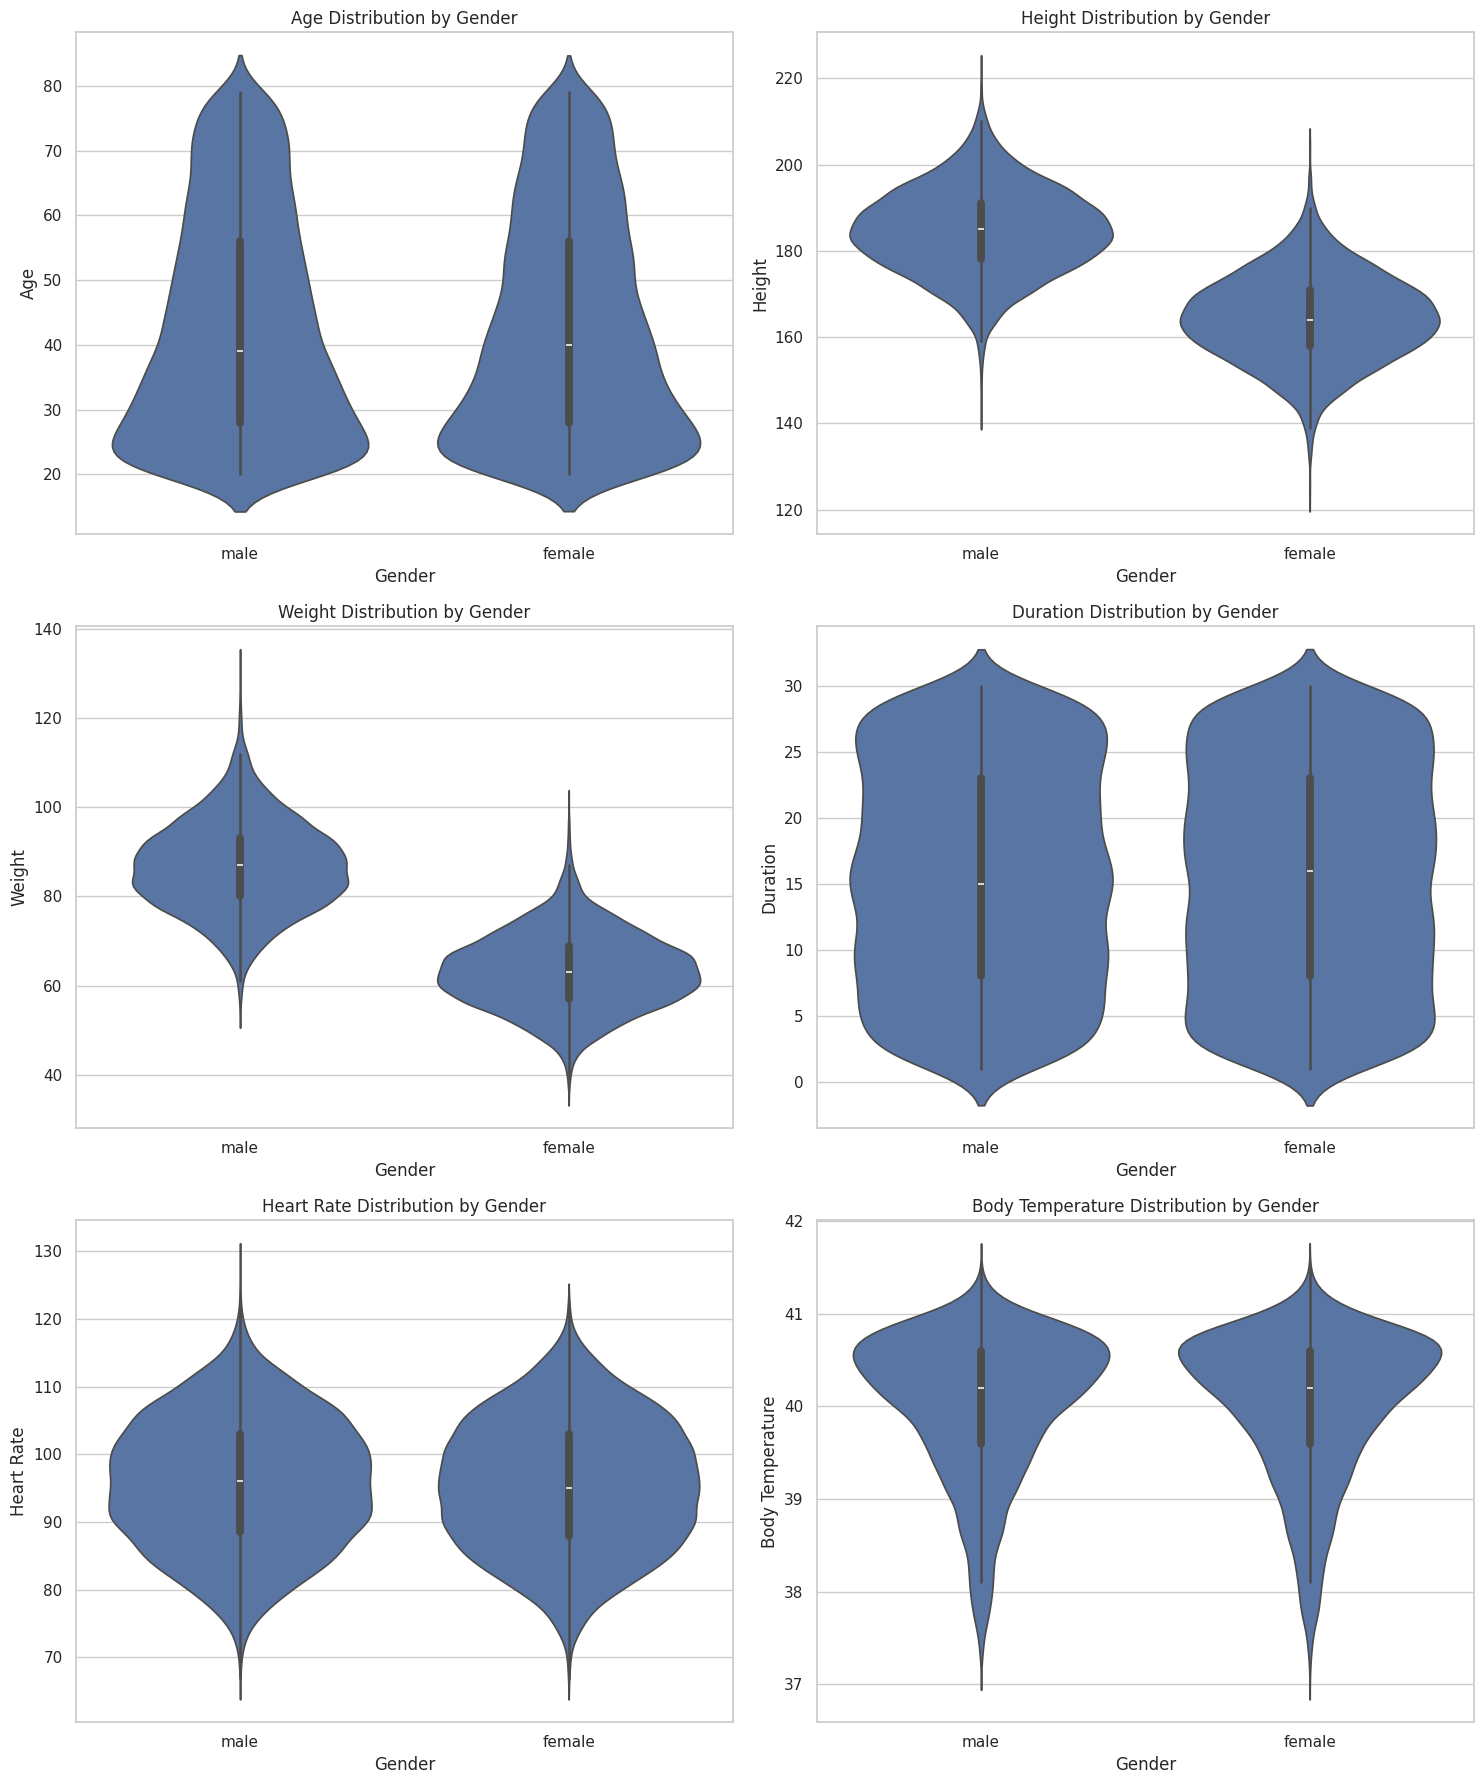

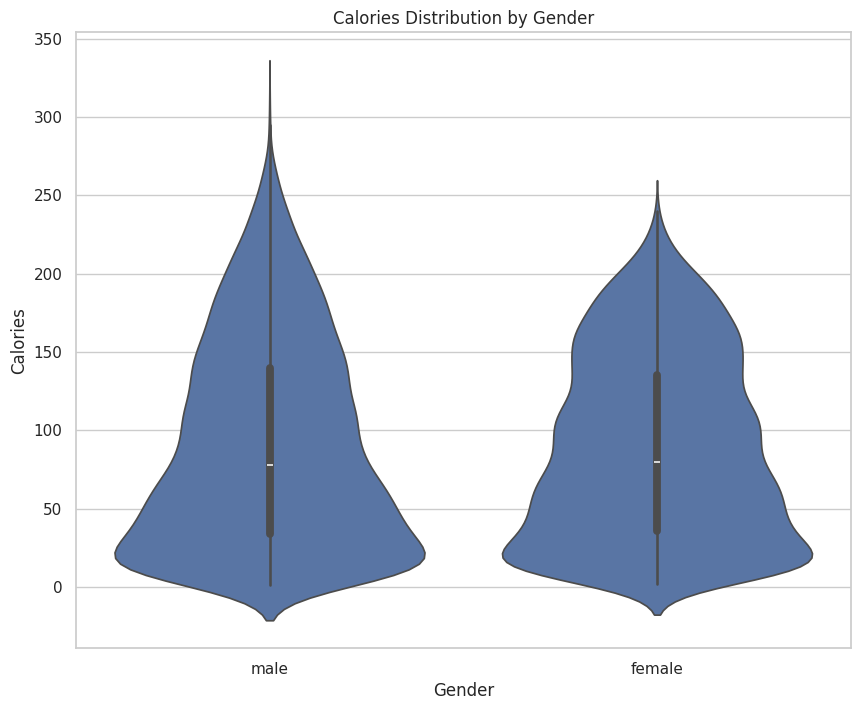

In [ ]:
# Correlation Heatmap visualization code
# Violin plot: Age distribution by Gender
sns.violinplot(x=data['Gender'], y=data['Age'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age distribution by Gender')
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 rows, 2 columns

# Violin plot: Age
sns.violinplot(ax=axes[0, 0], x=data['Gender'], y=data['Age'])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Age')
axes[0, 0].set_title('Age Distribution by Gender')

# Violin plot: Height
sns.violinplot(ax=axes[0, 1], x=data['Gender'], y=data['Height'])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Height')
axes[0, 1].set_title('Height Distribution by Gender')

# Violin plot: Weight
sns.violinplot(ax=axes[1, 0], x=data['Gender'], y=data['Weight'])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Weight')
axes[1, 0].set_title('Weight Distribution by Gender')

# Violin plot: Duration
sns.violinplot(ax=axes[1, 1], x=data['Gender'], y=data['Duration'])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Duration')
axes[1, 1].set_title('Duration Distribution by Gender')

# Violin plot: Heart Rate
sns.violinplot(ax=axes[2, 0], x=data['Gender'], y=data['Heart_Rate'])
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Heart Rate')
axes[2, 0].set_title('Heart Rate Distribution by Gender')

# Violin plot: Body Temp
sns.violinplot(ax=axes[2, 1], x=data['Gender'], y=data['Body_Temp'])
axes[2, 1].set_xlabel('Gender')
axes[2, 1].set_ylabel('Body Temperature')
axes[2, 1].set_title('Body Temperature Distribution by Gender')

# Adjust layout
plt.tight_layout()
plt.show()

# If you have an additional variable (Calories), you can create a new figure for it:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.violinplot(ax=ax, x=data['Gender'], y=data['Calories'])
ax.set_xlabel('Gender')
ax.set_ylabel('Calories')
ax.set_title('Calories Distribution by Gender')
plt.show()


#### Chart  - Pair Plot

In [ ]:
# Pair Plot visualization code
# Pair plot of numeric variables
sns.pairplot(data)
plt.title('Pair Plot of Numeric Variables')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Looking at these pair plot we can also find any relation between uncommon variables

## ***Feature Engineering & Data Pre-processing***

###Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
for i in ['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories']:
  data.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(data[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = data[i][(data[i] < lower_bound) | (data[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/data[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))


Outliers in Age is 0.00% with count 0
Outliers in Height is 0.09% with count 14
Outliers in Weight is 0.04% with count 6
Outliers in Duration is 0.00% with count 0
Outliers in Heart_Rate is 0.01% with count 1
Outliers in Body_Temp is 2.46% with count 369
Outliers in Calories is 0.03% with count 4


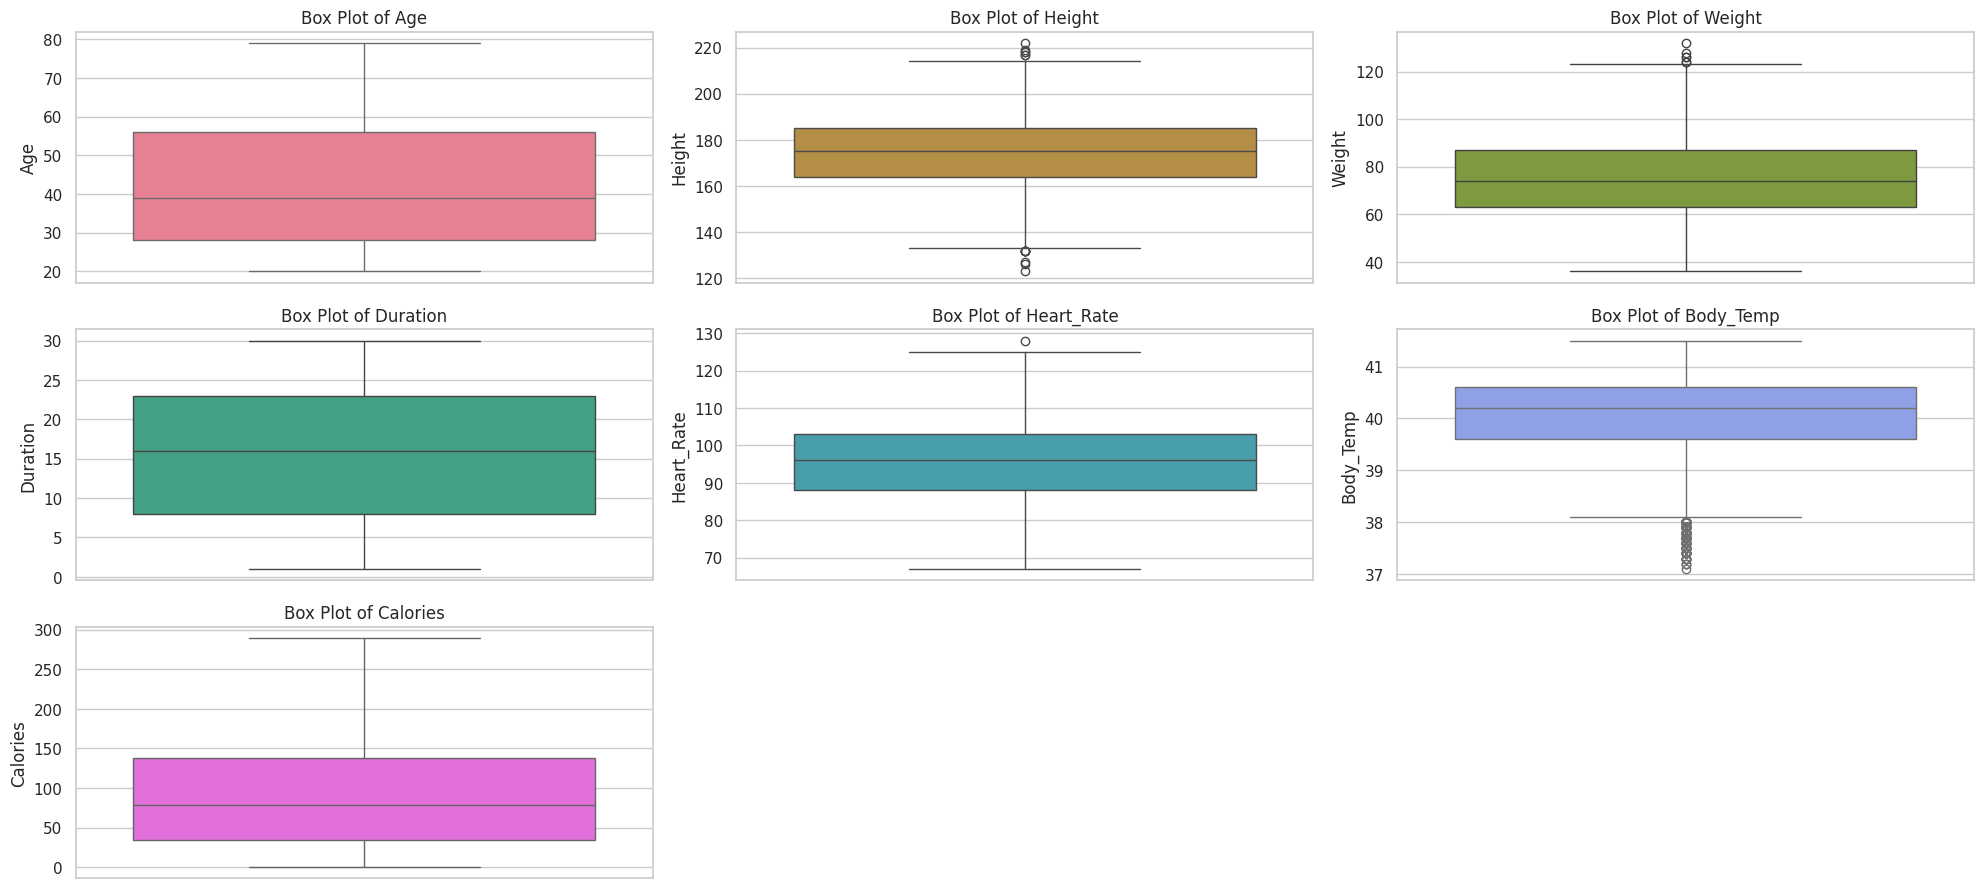

In [ ]:



# Define a function to identify and drop extreme outliers using the IQR method
def drop_extreme_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Drop extreme outliers for CRIM and B
for col in ['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories']:
    calories_df = drop_extreme_outliers(data, col)




# Set the style of the visualization
sns.set(style='whitegrid')

# Generate a list of colors
colors = sns.color_palette("husl", len(['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories']))

# Create a figure with a grid of subplots for box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories'], 1):
    plt.subplot(5, 3, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(data=calories_df[column], color=colors[i - 1])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [ ]:
calories_df.shape

(14996, 9)

In [ ]:
calories_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

### Dropping not useful columns

In [ ]:
calories_df.drop(['User_ID'], axis=1, inplace=True)

###Categorical Encoding

In [ ]:
calories_df.replace({'male': 0, 'female': 1},
           inplace=True)
calories_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Since Duration is highly corelated to calories we need to try to train model with and without including it for variying the model pefromance

- **Model with only duration**
- **Model with all the relevant columns**
- **Model with all the columns**

## ***7. ML Model Implementation***

### ML Model 1 - Model with only duration

In [ ]:
X = calories_df.drop(['Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Calories'],axis=1,index=None)
y = calories_df.drop(['Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)

### Data Splitting

In [ ]:
# Train and evaluate the models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

###Data Scaling

In [ ]:
# Plot the results
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Traning various model and finding accuracy score

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
		Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
	models[i].fit(X_train, y_train)

	print(f'{models[i]} : '.split('(')[0])

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(y_train, train_preds))

	val_preds = models[i].predict(X_test)
	print('Validation Error : ', mae(y_test, val_preds))
	print()


LinearRegression
Training Error :  13.46210311962203
Validation Error :  13.881794633424407

XGBRegressor
Training Error :  11.233209086800066
Validation Error :  11.764440574328106

Lasso
Training Error :  13.330452895649186
Validation Error :  13.736208123927815

RandomForestRegressor
Training Error :  11.233587585984505
Validation Error :  11.763969737101625

Ridge
Training Error :  13.461352579247938
Validation Error :  13.88093992512583



.

.

.

### ML Model - 2 Model with all the relevant columns

In [ ]:
X = calories_df.drop(['Duration','Calories'],axis=1,index=None)
y = calories_df.drop(['Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)


### Data Splitting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

###Data Scaling

In [ ]:
# Plot the results
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Traning various model and finding accuracy score

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
		Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
	models[i].fit(X_train, y_train)

	print(f'{models[i]} : '.split('(')[0])

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(y_train, train_preds))

	val_preds = models[i].predict(X_test)
	print('Validation Error : ', mae(y_test, val_preds))
	print()

LinearRegression
Training Error :  17.89652550790836
Validation Error :  17.84073514560149

XGBRegressor
Training Error :  7.459829251479113
Validation Error :  10.454353219726434

Lasso
Training Error :  17.928272797334067
Validation Error :  17.87749614566299

RandomForestRegressor
Training Error :  3.9512804823830168
Validation Error :  10.489435333333333

Ridge
Training Error :  17.896590153017
Validation Error :  17.840826595087023



.

.

.

### ML Model - 3 Model with all the columns

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
X = calories_df.drop(['Calories'],axis=1,index=None)
y = calories_df.drop(['Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)


### Data Splitting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

###Data Scaling

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Traning various model and finding accuracy score

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
		Lasso(), RandomForestRegressor(), Ridge()]

ml = {}
for i in range(5):
	models[i].fit(X_train, y_train)

	print(f'{models[i]} : '.split('(')[0])

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(y_train, train_preds))

	val_preds = models[i].predict(X_test)
	print('Validation Error : ', mae(y_test, val_preds))
	print()
	# Fixed the indentation on this line
	ml[f'{models[i]} : '.split('(')[0]]= mae(y_test, val_preds)

model_df = pd.DataFrame(list(ml.items()), columns=['Model', 'Metric'])

LinearRegression
Training Error :  8.289101897814778
Validation Error :  8.454754260126876

XGBRegressor
Training Error :  0.9498364367721358
Validation Error :  1.5332989134192467

Lasso
Training Error :  8.989932918917617
Validation Error :  9.20188379363427

RandomForestRegressor
Training Error :  0.6720740246748916
Validation Error :  1.7770699999999997

Ridge
Training Error :  8.288811771305566
Validation Error :  8.454422518953415



In [ ]:
model_df

,Model,Metric
0,LinearRegression,8.454754
1,XGBRegressor,1.533299
2,Lasso,9.201884
3,RandomForestRegressor,1.777070
4,Ridge,8.454423


<Axes: xlabel='Model', ylabel='Metric'>

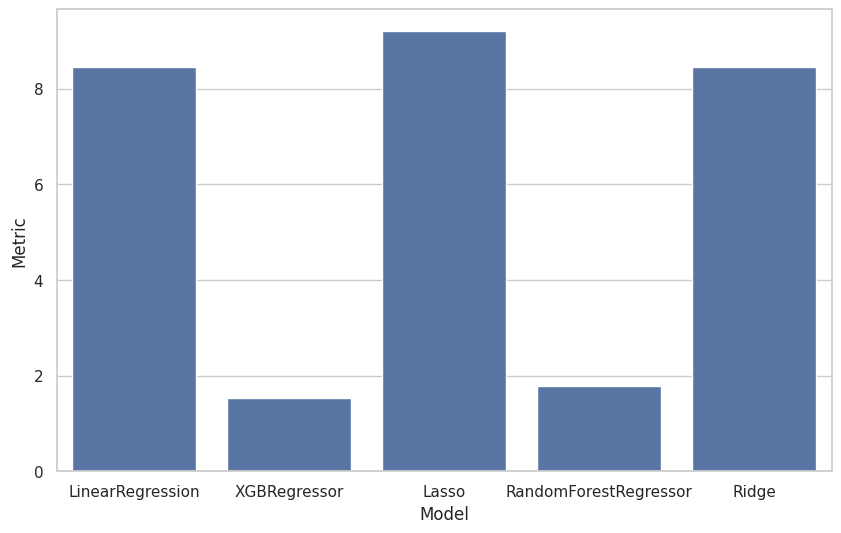

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Metric', data=model_df)

After looking at the model built on various columns of data set we can see models with all columns included has the highest performance
In which **XG boost and random forest** has the **least amount of error**
Since XG boost is slightly better than random forest
We will consider **XG Boost as a final model** and perform cross validation edition on it

### Cross Validation- K fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
-cross_val_score(XGBRegressor(), X, y, cv=kfold, scoring='neg_mean_squared_error')

array([4.38426096, 3.65400088, 4.89180277, 3.92889867, 4.26566955,
       4.50933095, 3.96910005, 4.08272716, 3.83655038, 4.75299095])

In [ ]:
-cross_val_score(XGBRegressor(), X, y, cv=kfold, scoring='neg_mean_squared_error').mean()

4.227533230491371

After doing cross validation VC MSE for our model based on XG boost is around 4.2

## ***8.*** ***Future Work***

In future we can extend the data source to diet, eating habits, work etc.And based on that we can build a larger model with all these data and will be able to provide the people better custom plans and recommendation for their health goals.

# **Conclusion**

From this project we found:-  
1. There is not much difference in calories burnt or heart rate based on gender.

2. Hiegh age people usually spend more calories for same exercise compared to the lower age.

3. Various biological measurements like height weight and heart it and body temperature shows normal distribution.


4. Duration of exercise heart read body temperature and calories burn are highly correlated.

5. Also  height and weight are also highly correlated.

6. XG boost and random forest are amoung then models to predic the calories based on various column we have.

### The End